In [1]:
import sys
sys.path.append('../')

import numpy as np
import torch

%matplotlib inline
import matplotlib.pyplot as plt

from modules.modules import VectorQuantizedVAE, GatedPixelCNN
from datasets import datasets

def norm_img(x):
    h = x.copy()
    h -= h.min()
    h /= h.max()
    return h


dataset = datasets.get_dataset('miniimagenet', '/home/genta/dataset/mini-imagenet/')

In [2]:
test_dataset = dataset['test']
num_channels = dataset['num_channels']

In [6]:
k = 512
hidden_size = 256

In [7]:
model = VectorQuantizedVAE(num_channels, hidden_size, k)

In [8]:
model.load_state_dict(torch.load('../models/vqvae/best.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [16]:
len(test_dataset._label_encoder)

20

In [17]:
len(dataset['train']._label_encoder)

64

In [18]:

hidden_prior = 64
num_layer = 15
n_classes = len(dataset['train']._label_encoder)
pixelcnn_model = GatedPixelCNN(k, hidden_prior, num_layer, n_classes=n_classes)

Skipping initialization of  GatedMaskedConv2d
Skipping initialization of  GatedMaskedConv2d
Skipping initialization of  GatedMaskedConv2d
Skipping initialization of  GatedMaskedConv2d
Skipping initialization of  GatedMaskedConv2d
Skipping initialization of  GatedMaskedConv2d
Skipping initialization of  GatedMaskedConv2d
Skipping initialization of  GatedMaskedConv2d
Skipping initialization of  GatedMaskedConv2d
Skipping initialization of  GatedMaskedConv2d
Skipping initialization of  GatedMaskedConv2d
Skipping initialization of  GatedMaskedConv2d
Skipping initialization of  GatedMaskedConv2d
Skipping initialization of  GatedMaskedConv2d
Skipping initialization of  GatedMaskedConv2d


In [19]:
pixelcnn_model

GatedPixelCNN(
  (embedding): Embedding(512, 64)
  (layers): ModuleList(
    (0): GatedMaskedConv2d(
      (class_cond_embedding): Embedding(64, 128)
      (vert_stack): Conv2d(64, 128, kernel_size=(4, 7), stride=(1, 1), padding=(3, 3))
      (vert_to_horiz): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
      (horiz_stack): Conv2d(64, 128, kernel_size=(1, 4), stride=(1, 1), padding=(0, 3))
      (horiz_resid): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      (gate): GatedActivation()
    )
    (1): GatedMaskedConv2d(
      (class_cond_embedding): Embedding(64, 128)
      (vert_stack): Conv2d(64, 128, kernel_size=(2, 3), stride=(1, 1), padding=(1, 1))
      (vert_to_horiz): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
      (horiz_stack): Conv2d(64, 128, kernel_size=(1, 2), stride=(1, 1), padding=(0, 1))
      (horiz_resid): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      (gate): GatedActivation()
    )
    (2): GatedMaskedConv2d(
      (class_cond_embedding

In [20]:
pixelcnn_model.load_state_dict(torch.load('../models/pixelcnn_miniimagenet_k512/best.pixelcnn.model'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [21]:
model.eval()
model.cpu()
pixelcnn_model.eval()
pixelcnn_model.cpu()

GatedPixelCNN(
  (embedding): Embedding(512, 64)
  (layers): ModuleList(
    (0): GatedMaskedConv2d(
      (class_cond_embedding): Embedding(64, 128)
      (vert_stack): Conv2d(64, 128, kernel_size=(4, 7), stride=(1, 1), padding=(3, 3))
      (vert_to_horiz): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
      (horiz_stack): Conv2d(64, 128, kernel_size=(1, 4), stride=(1, 1), padding=(0, 3))
      (horiz_resid): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      (gate): GatedActivation()
    )
    (1): GatedMaskedConv2d(
      (class_cond_embedding): Embedding(64, 128)
      (vert_stack): Conv2d(64, 128, kernel_size=(2, 3), stride=(1, 1), padding=(1, 1))
      (vert_to_horiz): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
      (horiz_stack): Conv2d(64, 128, kernel_size=(1, 2), stride=(1, 1), padding=(0, 1))
      (horiz_resid): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      (gate): GatedActivation()
    )
    (2): GatedMaskedConv2d(
      (class_cond_embedding

In [22]:
np.random.seed(0)
index = np.random.permutation(len(test_dataset))[:10]
img = [test_dataset[i][0] for i in index]
img = torch.stack(img)

label = [test_dataset[i][1] for i in index]
label = torch.Tensor(label)
label =label.long()

In [23]:
pixelcnn_model.cuda()

GatedPixelCNN(
  (embedding): Embedding(512, 64)
  (layers): ModuleList(
    (0): GatedMaskedConv2d(
      (class_cond_embedding): Embedding(64, 128)
      (vert_stack): Conv2d(64, 128, kernel_size=(4, 7), stride=(1, 1), padding=(3, 3))
      (vert_to_horiz): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
      (horiz_stack): Conv2d(64, 128, kernel_size=(1, 4), stride=(1, 1), padding=(0, 3))
      (horiz_resid): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      (gate): GatedActivation()
    )
    (1): GatedMaskedConv2d(
      (class_cond_embedding): Embedding(64, 128)
      (vert_stack): Conv2d(64, 128, kernel_size=(2, 3), stride=(1, 1), padding=(1, 1))
      (vert_to_horiz): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
      (horiz_stack): Conv2d(64, 128, kernel_size=(1, 2), stride=(1, 1), padding=(0, 1))
      (horiz_resid): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      (gate): GatedActivation()
    )
    (2): GatedMaskedConv2d(
      (class_cond_embedding

In [45]:
latent = pixelcnn_model.generate(label.cuda(), shape=(16, 16), batch_size=10)

latent = latent.cpu()

out = model.decode(latent)

In [49]:
out.shape

torch.Size([10, 3, 64, 64])

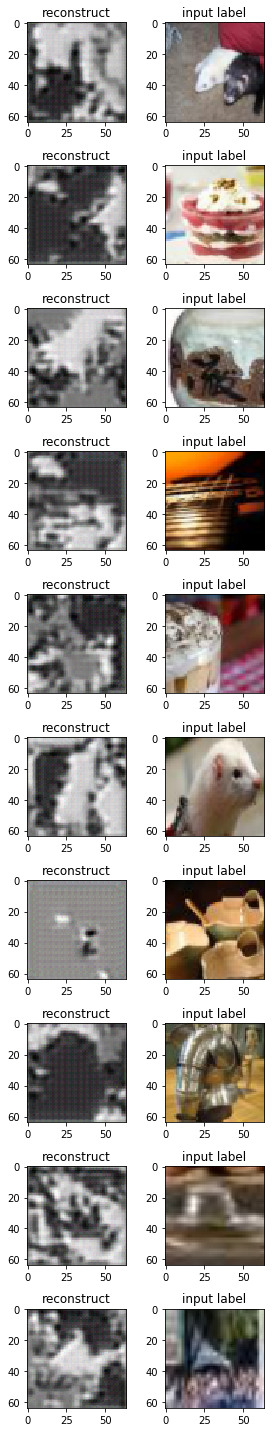

In [56]:
np_data = out.detach().numpy()
plt.figure(figsize=(4, len(np_data)*2))
for cnt, i in enumerate(np_data):
    tmp = np.transpose(norm_img(i), (1, 2, 0))
#     tmp = np.transpose(i, (1, 2, 0))
#     tmp = np.transpose(tmp, (1, 2, 0))
    plt.subplot(len(np_data), 2, 2*cnt+1)
    plt.title('reconstruct')
    plt.imshow(tmp)
    plt.subplot(len(np_data), 2, 2*cnt+2)
    tmp = np.transpose(norm_img(img[cnt].numpy()), (1, 2, 0))
    plt.title('input label')
    plt.imshow(tmp)
plt.tight_layout()
plt.savefig('imagenet.png')
plt.show()